# Virtual Internship Program @AINE.AI Submitted by: Sanjhal Jain

Project 7: Statistical Analysis and Hypothesis Testing 

### Project : Increasing YoY revenue from game purchases by increasing retention rate of gamers

About the project: The project involves working on data related to Cookie Cats – a hugely popular puzzle game. As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in the player's enjoyment of the game being increased and prolonged. But where should the gates be placed and how the placement of the gates can retain the players for more time

### Objective: 
The overall objective of the project is to test the company’s CEO’s hypothesis that moving the first gate from level 30 to level 40 increases retention rate and the number of game rounds played. The CEO believes that players are churning because the first gate encountered at level 30 is too early which forces players to wait before they can proceed further in the game.

In order to increase player retention rate, developers ran AB-test by moving the first gate from level 30 to level 40 for some players i.e.,

group A would encounter the gate at level 30, and
group B would encounter the gate at level 40 
The project requires you to:

### Project scope : 
Perform exploratory data analysis of the given datasets and generate their statistical summary.
Perform A/B testing between the two groups of data to analyze the impact on player retention if the first gate in Cookie Cats is moved from level 30 to level 40.

1) Perform initial data preparation.
2) Generate statistical summary and plot charts to answer: a. What is the overall 7-day retention rate of the game? b. How many players never played the game after installing it? c. Does the number of players decrease as the levels become difficult?
3) Generate crosstab for two player groups to understand the difference in the 1- day and 7-days retention rate and total number of game rounds played.
4) Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played. Check the assumptions of two sample test: ○ i. Normal distribution – Apply Shapiro test ○ ii. Homogeneity of variance – Apply Levene’s test
5) Apply the relevant two sample significance test method based on the results from the tests for normality and homogeneity
6) Analyze the significance of the test results and decide which level has more advantage in terms of player retention?
7) Use bootstrap resampling to plot retention rate distribution for both groups to visualize the effect of different versions of the game on retention

# Packages and setup

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Reading data and initial processing

In [2]:
#Read data using pandas
user_df=pd.read_csv("cookie_cats.csv") 
#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:
Shape of the data i.e. no. of rows and columns
First 5 rows of the raw data:
Data types for the data set:
Shape of the data i.e. no. of rows and columns
First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# Exercise 

Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

Q1.1 Identify missing value

In [3]:
#Check for any missing values in the data using isnull() function
user_df.isnull()

,userid,version,sum_gamerounds,retention_1,retention_7
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
90184,False,False,False,False,False
90185,False,False,False,False,False
90186,False,False,False,False,False
90187,False,False,False,False,False


## Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

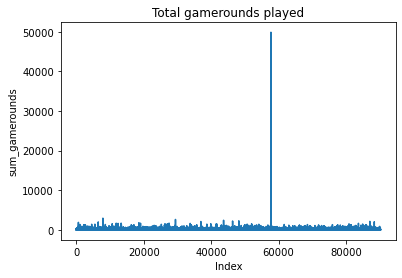

In [8]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [9]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier
user_df['sum_gamerounds'].idxmax()
user_df=user_df.drop(user_df.index[57702])

57702

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

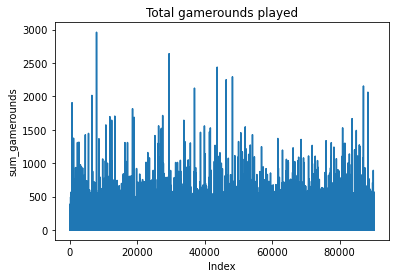

In [10]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

# Q2. Plotting summary statistics and identifying  trends to answer some business questions- exploratory data analysis

## Q2.1 What is the overall 7-day retention rate of the game?

In [11]:
#Insert calculation for 7-day retention rate

retention_rate_7=user_df['retention_7'].values.sum()/(user_df['userid'].count()) *100

print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")

Overal 7 days retention rate of the game for both versions is:  18.60557945624695 %


## Q2.2 How many players never played the game after installing?

In [12]:
# Find number of customers with sum_gamerounds is equal to zero
data=user_df.loc[user_df['sum_gamerounds']==0]
data['userid'].count()

3994

## Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

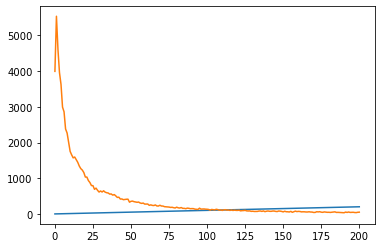

In [13]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart
x=user_df.groupby("sum_gamerounds").userid.count().reset_index().head(201)
plt.plot(x)

### interpretation : 
    we see that as the level of difficulty given the increase in number of levels, players tend to play lesser rounds

# Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

## Q3.1 Seven days retention rate summary for different game versions

In [15]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


### interpretation  from the crosstab table :
gate_30 has higher  days retention rate while gate_40 has lower seven days retention rate

## Q3.2 Gamerounds summary for different game versions

In [17]:
#use pandas group by to calculate average game rounds played summarized by different versions
user_df["Retention"] = np.where((user_df.retention_1 == True) & (user_df.retention_7 == True), 1,0)
user_df.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])

count  median        mean         std   max
version Retention                                             
gate_30 0          38023      12   28.070273   48.017452  1072
        1           6676     127  183.886309  189.626390  2961
gate_40 0          38983      12   28.103353   48.927850  2640
        1           6506     133  190.282355  194.220077  2294

### Interpretation :
    we see that total number of gamerounds played in total by each player  donot considerably differin total number,  based on different versions of the game



# Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

## Initial data processing

In [18]:
#Define A/B groups for hypothesis testing
user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
groupA = user_df[user_df["version"] == "A"]["sum_gamerounds"]
groupB = user_df[user_df["version"] == "B"]["sum_gamerounds"]

## Q4.1 Shapiro test of Normality

In [19]:
from scipy.stats import shapiro
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro(groupA)

#test for group_B
shapiro(groupB)

ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

ShapiroResult(statistic=0.4825654625892639, pvalue=0.0)

### shapiro test of normality : Analysis and interpretion the results of : are the two groups normally distributed?

Distribution is not normal as p < 0.05

## Q4.2 Test of homegienity of variance

In [20]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results
stats.levene(groupA,groupB)

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

### final recommendation from the results of Levene's test

As p-value > 0.05 hence null hypothesis is accepted i.e. both groups have equal variance

## Q4.3 Test of significance: Two sample test

In [21]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis
from scipy.stats import mannwhitneyu
mannwhitneyu(groupA,groupB)

MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

### final recommendation from the results of two sample hyothesis testing

As p-value < 0.05 hence null hypothesis is rejected i.e. both groups are different

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [22]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function

user_df.groupby("version").retention_1.mean()
user_df.groupby("version").retention_7.mean()

version
A    0.448198
B    0.442283
Name: retention_1, dtype: float64

version
A    0.190183
B    0.182000
Name: retention_7, dtype: float64

## final recommendation to the company regarding which level works best as the first gate - Level 30 or Level 40

1 day and 7 day retention rate is higher at level-30. Hence as a business analyst and at a decision making capacity it is advisable to keep the in app purchase option after gate 30 not 40 as it will generate more retention of users .
